In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #used for make a graph with two feature

In [3]:
x_train = pd.read_csv("../datasets/titanic dataset/train.csv")
x_test = pd.read_csv("../datasets/titanic dataset/test.csv")
y_test = pd.read_csv("../datasets/titanic dataset/gender_submission.csv")

In [46]:
y_test

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [47]:
y_train=x_train["Survived"]

In [48]:
x_test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [49]:
x_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [50]:
x_train=x_train.drop("PassengerId",axis=1)
# axis=0 if you want to remove row , 1 to columns
x_train=x_train.drop("Name",axis=1)
x_train=x_train.drop("Ticket",axis=1)
x_train=x_train.drop("Fare",axis=1)
x_train=x_train.drop("Cabin",axis=1)

x_test=x_test.drop("PassengerId",axis=1)
# axis=0 if you want to remove row , 1 to columns
x_test=x_test.drop("Name",axis=1)
x_test=x_test.drop("Ticket",axis=1)
x_test=x_test.drop("Fare",axis=1)
x_test=x_test.drop("Cabin",axis=1)



In [51]:
print(x_train["Age"].isna().sum()) #apply it to all col to know which is have nan values
print(x_test["Age"].isna().sum())

177
86


In [52]:
print(x_train["Embarked"].isna().sum()) #apply it to all col to know which is have nan values
print(x_test["Embarked"].isna().sum())

2
0


In [53]:
x_train["Age"]= x_train["Age"].fillna(value=x_train["Age"].mean()) #mean if i have many number and i want to fill between them


In [54]:
x_test["Age"]= x_test["Age"].fillna(value=x_test["Age"].mean())

In [55]:
x_train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [56]:
x_train["Embarked"]= x_train["Embarked"].fillna(value=x_train["Embarked"].mode()[0]) #if i have string mode choose the most repeated one

In [57]:
x_train["Embarked"].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [58]:
print(x_train["Embarked"].isna().sum()) #apply it to all col to know which is have nan values

0


In [59]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  891 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


In [60]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Embarked  418 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 19.7+ KB


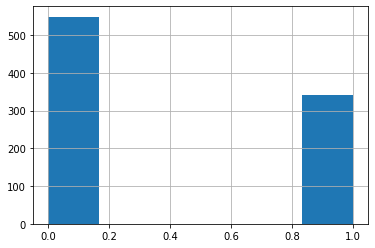

In [61]:
x_train["Survived"].hist(bins=6)

In [89]:
#string value 
x_train["Sex"]=pd.factorize(x_train["Sex"])[0]
x_test["Sex"]=pd.factorize(x_test["Sex"])[0]

In [90]:
x_train["Embarked"]=pd.factorize(x_train["Embarked"])[0]
x_test["Embarked"]=pd.factorize(x_test["Embarked"])[0]

In [64]:
#x_train["Embarked"]=pd.get_dummies(x_train["Embarked"])
print(x_train["Embarked"])

0      0
1      1
2      0
3      0
4      0
      ..
886    0
887    0
888    0
889    1
890    2
Name: Embarked, Length: 891, dtype: int64


In [65]:
print(x_train)

     Survived  Pclass  Sex        Age  SibSp  Parch  Embarked
0           0       3    0  22.000000      1      0         0
1           1       1    1  38.000000      1      0         1
2           1       3    1  26.000000      0      0         0
3           1       1    1  35.000000      1      0         0
4           0       3    0  35.000000      0      0         0
..        ...     ...  ...        ...    ...    ...       ...
886         0       2    0  27.000000      0      0         0
887         1       1    1  19.000000      0      0         0
888         0       3    1  29.699118      1      2         0
889         1       1    0  26.000000      0      0         1
890         0       3    0  32.000000      0      0         2

[891 rows x 7 columns]


In [66]:
#plt.bar(x_train["Embarked"],height=2,color='r',width=0.3)
#distplot from seaborn library as sns used to make relation between two feature with graph 

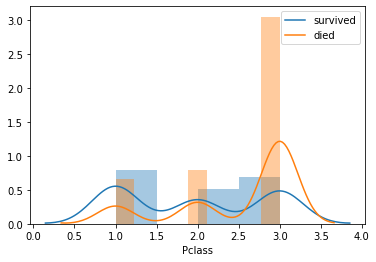

In [67]:
sns.distplot(x_train.loc[x_train["Survived"]==1]["Pclass"],kde_kws={"label":"survived"})
sns.distplot(x_train.loc[x_train["Survived"]==0]["Pclass"],kde_kws={"label":"died"})

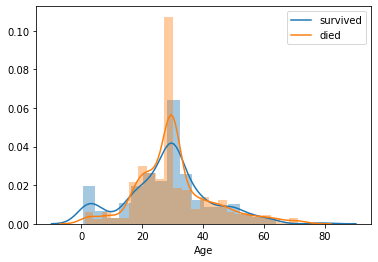

In [68]:
sns.distplot(x_train.loc[x_train["Survived"]==1]["Age"],kde_kws={"label":"survived"})
sns.distplot(x_train.loc[x_train["Survived"]==0]["Age"],kde_kws={"label":"died"})

C:\Users\abanop\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


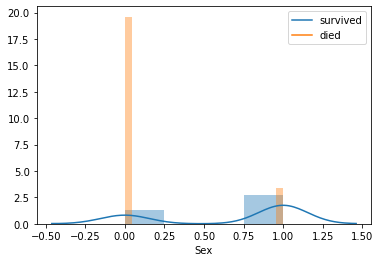

In [69]:
sns.distplot(x_train.loc[x_train["Survived"]==1]["Sex"],kde_kws={"label":"survived",})
sns.distplot(x_train.loc[x_train["Survived"]==0]["Sex"],kde_kws={"label":"died"})

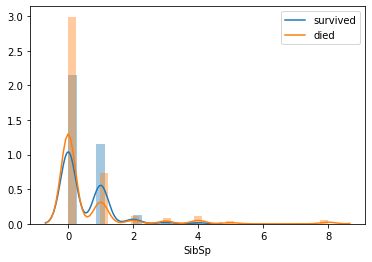

In [70]:
sns.distplot(x_train.loc[x_train["Survived"]==1]["SibSp"],kde_kws={"label":"survived"})
sns.distplot(x_train.loc[x_train["Survived"]==0]["SibSp"],kde_kws={"label":"died"})

In [71]:
#cut from panda used to  age تقسيم
#x_train["Age"]=pd.cut(x_train["Age"],bins=4)
# def handle_non_numerical_data(x_train):
#     columns=x_train.columns.values
    
#     for column in columns:
#         text_digit_vals={'yes':1,'no':0}
#         def convert_to_int(val):
#             return text_digit_vals[val]
        
#         if x_train[column].dtypes != np.int64 and x_train[column].dtypes != np.float64:
#             column_contents=x_train[column].values.tolist()
#             unique_elements=set(column_contents)
#             x=0
#             for unique in unique_elements:
#                 if unique not in text_digit_vals:
#                     text_digit_vals[unique]=x
#                     x+=1
#             x_train[column]=list(map(convert_to_int,x_train[column]))
                                
#     return x_train
                                
# x_train= handle_non_numerical_data(x_train)
# x_train= handle_non_numerical_data(x_test)


In [72]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  891 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 48.9 KB


In [73]:
x_train=x_train.drop("Survived",axis=1)

x_train.head(5)


,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,0,22.0,1,0,0
1,1,1,38.0,1,0,1
2,3,1,26.0,0,0,0
3,1,1,35.0,1,0,0
4,3,0,35.0,0,0,0


In [74]:
x_test.head(5)

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,0,34.5,0,0,0
1,3,1,47.0,1,0,1
2,2,0,62.0,0,0,0
3,3,0,27.0,0,0,1
4,3,1,22.0,1,1,1


In [75]:
y_train.head(5)


0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [76]:
y_test=y_test.drop("PassengerId",axis=1)

y_test.head(5)


,Survived
0,0
1,1
2,0
3,0
4,1


In [77]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit(x_train).transform(x_train)
x_test_scaled=scaler.fit(x_test).transform(x_test)

In [80]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,0,22.000000,1,0,0
1,1,1,38.000000,1,0,1
2,3,1,26.000000,0,0,0
3,1,1,35.000000,1,0,0
4,3,0,35.000000,0,0,0
...,...,...,...,...,...,...
886,2,0,27.000000,0,0,0
887,1,1,19.000000,0,0,0
888,3,1,29.699118,1,2,0
889,1,0,26.000000,0,0,1


In [81]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [78]:
from sklearn.linear_model import LogisticRegression

regressor1=LogisticRegression(random_state=0)

regressor1.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [79]:
predict1=regressor1.predict(x_test)

In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predict1)

array([[241,  25],
       [  8, 144]], dtype=int64)

In [87]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predict1))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94       266
           1       0.85      0.95      0.90       152

    accuracy                           0.92       418
   macro avg       0.91      0.93      0.92       418
weighted avg       0.93      0.92      0.92       418



In [83]:
from sklearn.metrics import accuracy_score 
print('accuracy =',100*accuracy_score(y_test,predict1))

accuracy = 92.10526315789474


In [38]:
from sklearn.svm import SVC

In [39]:
regressor2=SVC(kernel="rbf",random_state=0)

In [40]:
regressor2.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [41]:
pred2=regressor2.predict(x_test)

In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred2)

array([[258,   8],
       [143,   9]], dtype=int64)

In [43]:
from sklearn.metrics import accuracy_score
print("accuracy = ",100*accuracy_score(y_test,pred2))


accuracy =  63.8755980861244


In [52]:
mynum=np.array([1,0,66,1,1,0]).reshape(1,-1)
LR_predict=regressor1.predict(mynum)
SVM_predict=regressor2.predict(mynum)

In [53]:
LR_predict

array([0], dtype=int64)

In [144]:
#SVM_predict

array([0], dtype=int64)